<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

## Filter for Movies

In [2]:
netflix_df = netflix_df[netflix_df['type'] == 'Movie']

In [3]:
## Exploratory of the data head

In [4]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas


## Searching for every movie from the 90s

In [16]:
# Filter the data for movies released in the 1990s and store it in movie90
# movie90 = np.logical_and(df["release_year"] >= 1990, df["release_year"] < 2000)

# Filter the data for movies released in the 1990s and update the dataframe
netflix_df = netflix_df[np.logical_and(netflix_df["release_year"] >= 1990, netflix_df["release_year"] <= 1999)]
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
352,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,"May 11, 2020",1994,160,Broke and with no concrete plans for the futur...,Action
431,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,"December 1, 2019",1999,95,When diabolical genius Dr. Evil travels back i...,Action


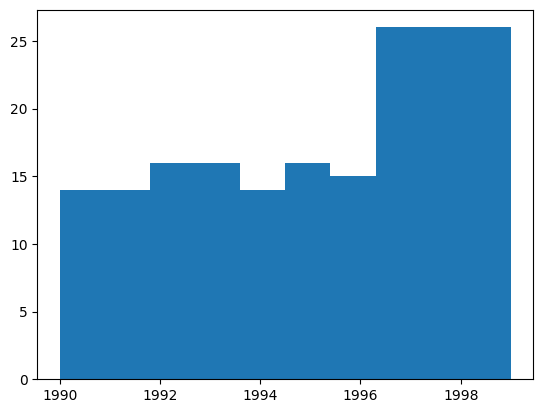

In [6]:
plt.hist(netflix_df["release_year"], bins = 10)
plt.show()

## Find the most frequent movie duration

Calculate most frequent movie duration in the 90s

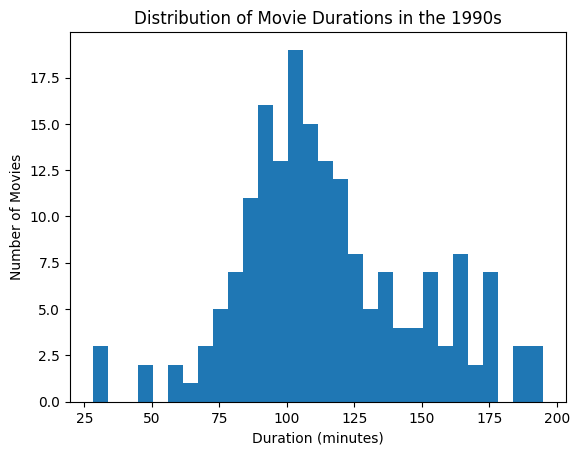

In [7]:
# Visualize the duration column of your filtered data to see the distribution of movie durations
# See which bar is the highest and save the duration value, this doesn't need to be exact!
plt.hist(netflix_df["duration"], bins=30)
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

### Duration visible through histogram

In [8]:
duration = 100

### Further detailed exploration

In [9]:
netflix_df.describe()

,release_year,duration
count,183.00000,183.000000
mean,1995.15847,115.120219
std,2.92808,33.201959
min,1990.00000,28.000000
25%,1993.00000,94.000000
50%,1996.00000,108.000000
75%,1998.00000,136.000000
max,1999.00000,195.000000


Creat Histogram to verify the calculation

In [10]:
duration_counts = netflix_df.groupby('duration').size()

print(duration_counts)

duration_count = netflix_df['duration'].value_counts().index[0]
print(duration_count)

duration
28     1
30     1
31     1
49     2
56     1
      ..
187    1
189    1
191    1
193    1
195    1
Length: 91, dtype: int64
94


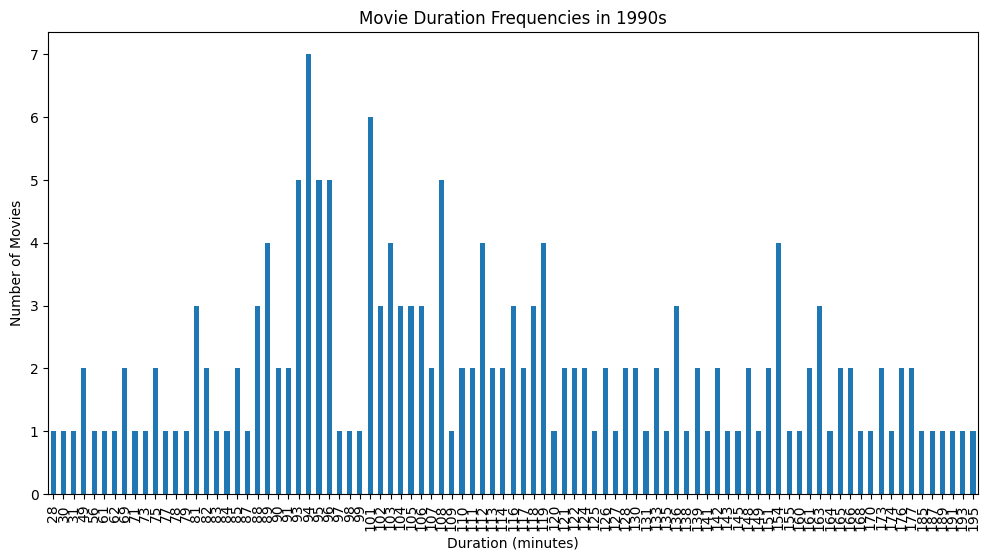

In [11]:
# Bar plot of duration counts
plt.figure(figsize=(12, 6))
duration_counts.plot(kind='bar')
plt.title('Movie Duration Frequencies in 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

## Count the number of short action movies from the 1990s

In [15]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
352,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,"May 11, 2020",1994,160,Broke and with no concrete plans for the futur...,Action
431,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,"December 1, 2019",1999,95,When diabolical genius Dr. Evil travels back i...,Action


In [13]:
# filter for action movies in the 90s
netflix_df = netflix_df[(netflix_df['genre'] == 'Action')]

# Initialize counter
short_movie_count = 0

# Iteration through movies and count those less than 90 minutes
for duration in netflix_df['duration']:
    if duration < 90:
        short_movie_count += 1
print("There are " + str(short_movie_count) + " short action movies")

There are 7 short action movies


### Verify the results through a scatter plot

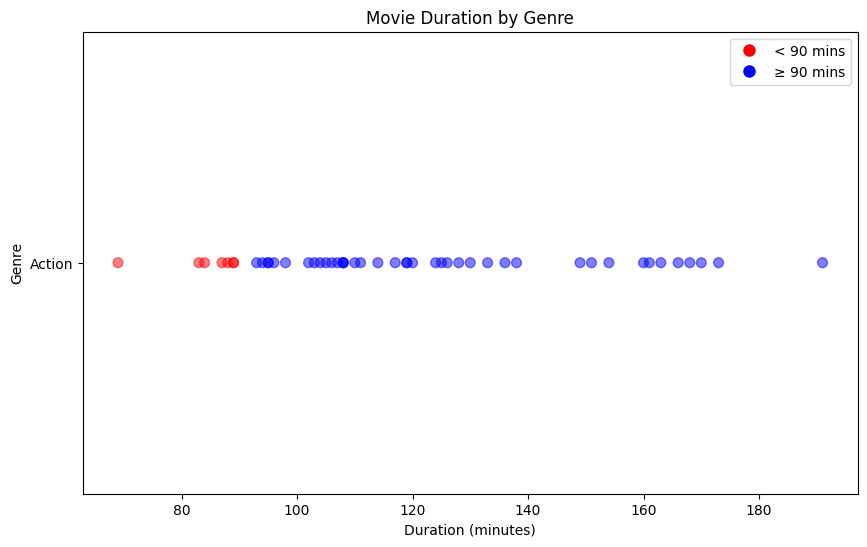

In [14]:
# Data
x = netflix_df['duration']
y = netflix_df['genre']

# Color list based on duration
colors = ['red' if duration < 90 else 'blue' for duration in x]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=50, c=colors, alpha=0.5)

# Customization
plt.title('Movie Duration by Genre')
plt.xlabel('Duration (minutes)')
plt.ylabel('Genre')

# Legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor='red', label='< 90 mins', markersize=10),
                  Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor='blue', label='≥ 90 mins', markersize=10)]
plt.legend(handles=legend_elements)

plt.show()